In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np ; np.random.seed(sum(map(ord, "aesthetics")))

from sklearn.datasets import make_classification 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report as cr
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
from pprint import pprint 
from collections import defaultdict


In [2]:
data = pd.read_csv("german_data.csv", sep = ';')
data.head()



,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   employmentsince        1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   statussex              1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  residencesince         1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

In [4]:
data.classification.replace([1,2], [1,0], inplace=True)

In [5]:
numvars = [ 'duration', 'creditamount', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable', 'classification']
numdata_std = pd.DataFrame(StandardScaler().fit_transform(data[numvars].drop(['classification'], axis=1)))


In [6]:
catvars = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']
d = defaultdict(LabelEncoder)

# Encoding
ndata = data[catvars].apply(lambda x: d[x.name].fit_transform(x))

# Вывод трансформированных переменных
for x in range(len(catvars)):
    print(catvars[x],": ", data[catvars[x]].unique())
    print(catvars[x],": ", ndata[catvars[x]].unique())

dummyvars = pd.get_dummies(data[catvars])


existingchecking :  ['A11' 'A12' 'A14' 'A13']
existingchecking :  [0 1 3 2]
credithistory :  ['A34' 'A32' 'A33' 'A30' 'A31']
credithistory :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
employmentsince :  ['A75' 'A73' 'A74' 'A71' 'A72']
employmentsince :  [4 2 3 0 1]
statussex :  ['A93' 'A92' 'A91' 'A94']
statussex :  [2 1 0 3]
otherdebtors :  ['A101' 'A103' 'A102']
otherdebtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
otherinstallmentplans :  ['A143' 'A141' 'A142']
otherinstallmentplans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreignworker :  ['A201' 'A202']
foreignworker :  [0 1]


In [7]:
data_new = pd.concat([data[numvars], dummyvars], axis = 1)
dc = pd.concat([ndata, data[numvars]], axis = 1)
print(data_new.shape)


(1000, 62)


In [8]:
data_new.head()

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,6,1169,4,4,67,2,1,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0


Text(0.5, 1, 'Correlation Heatmap')

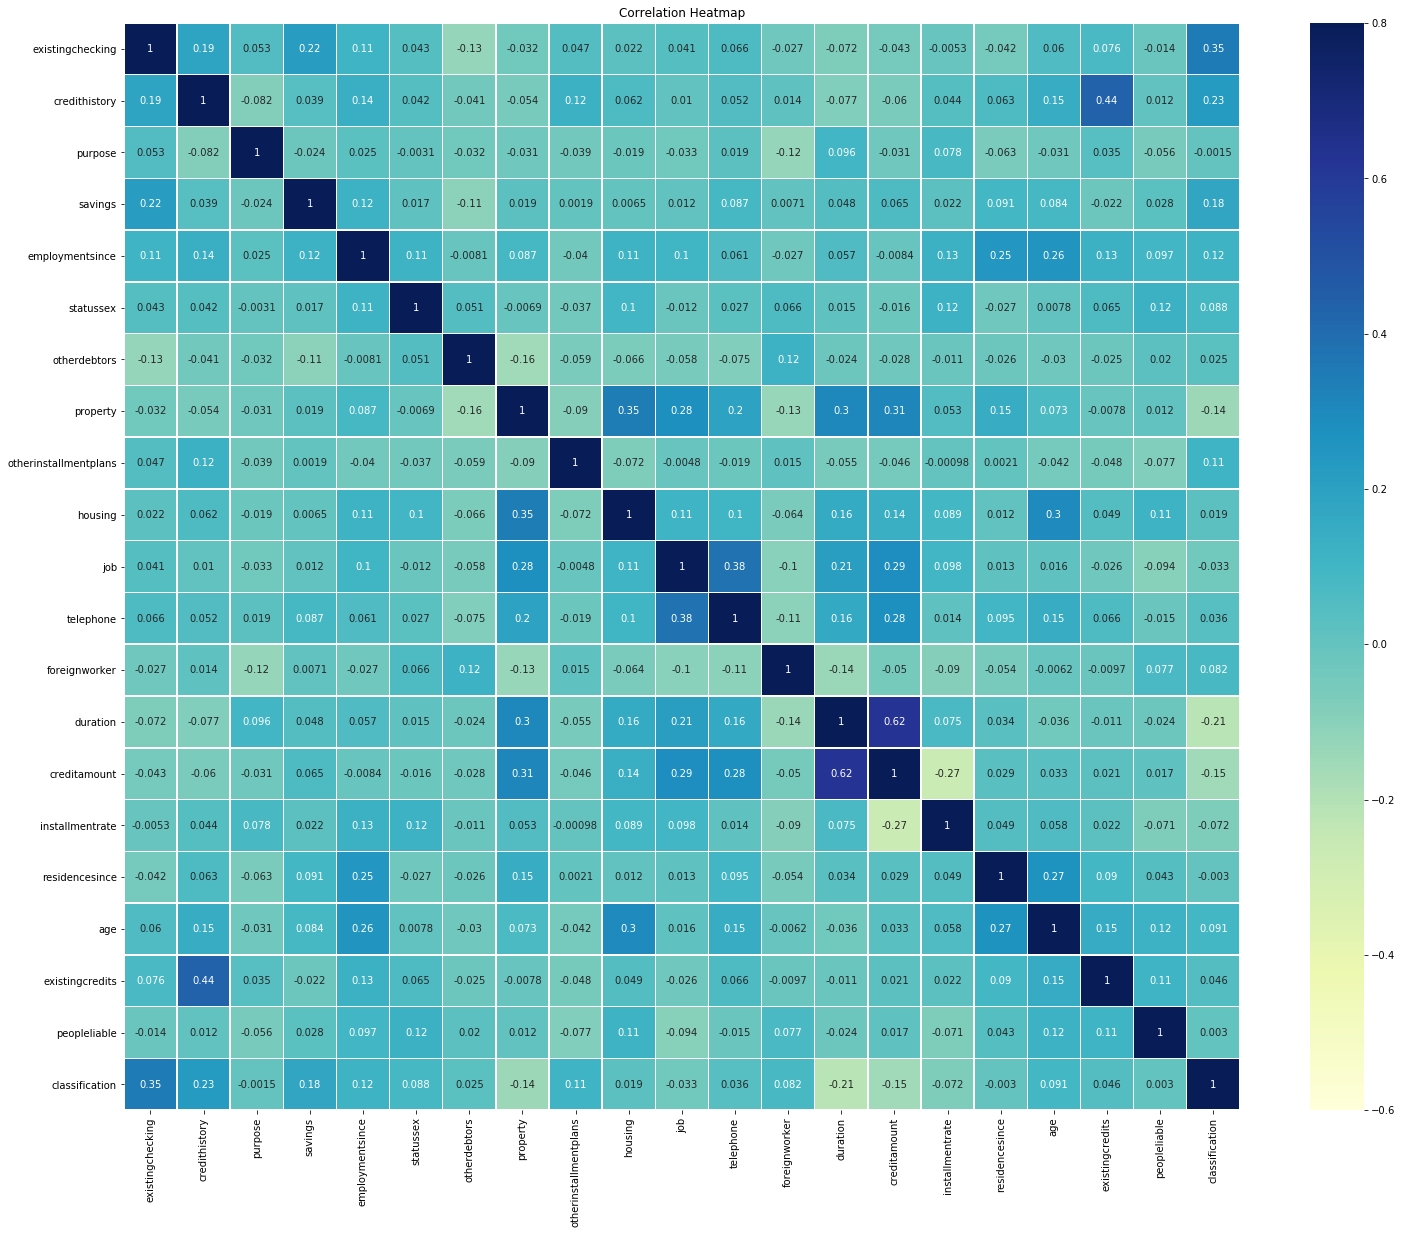

In [9]:
plt.rcParams['figure.figsize'] = (25,20)
sns.heatmap(pd.concat([ndata, data_new[numvars]], axis = 1).corr(), cmap="YlGnBu", vmin = -.6, annot = True, vmax = .8,
           linewidths=.5)
plt.title('Correlation Heatmap')


<Figure size 1440x1440 with 0 Axes>

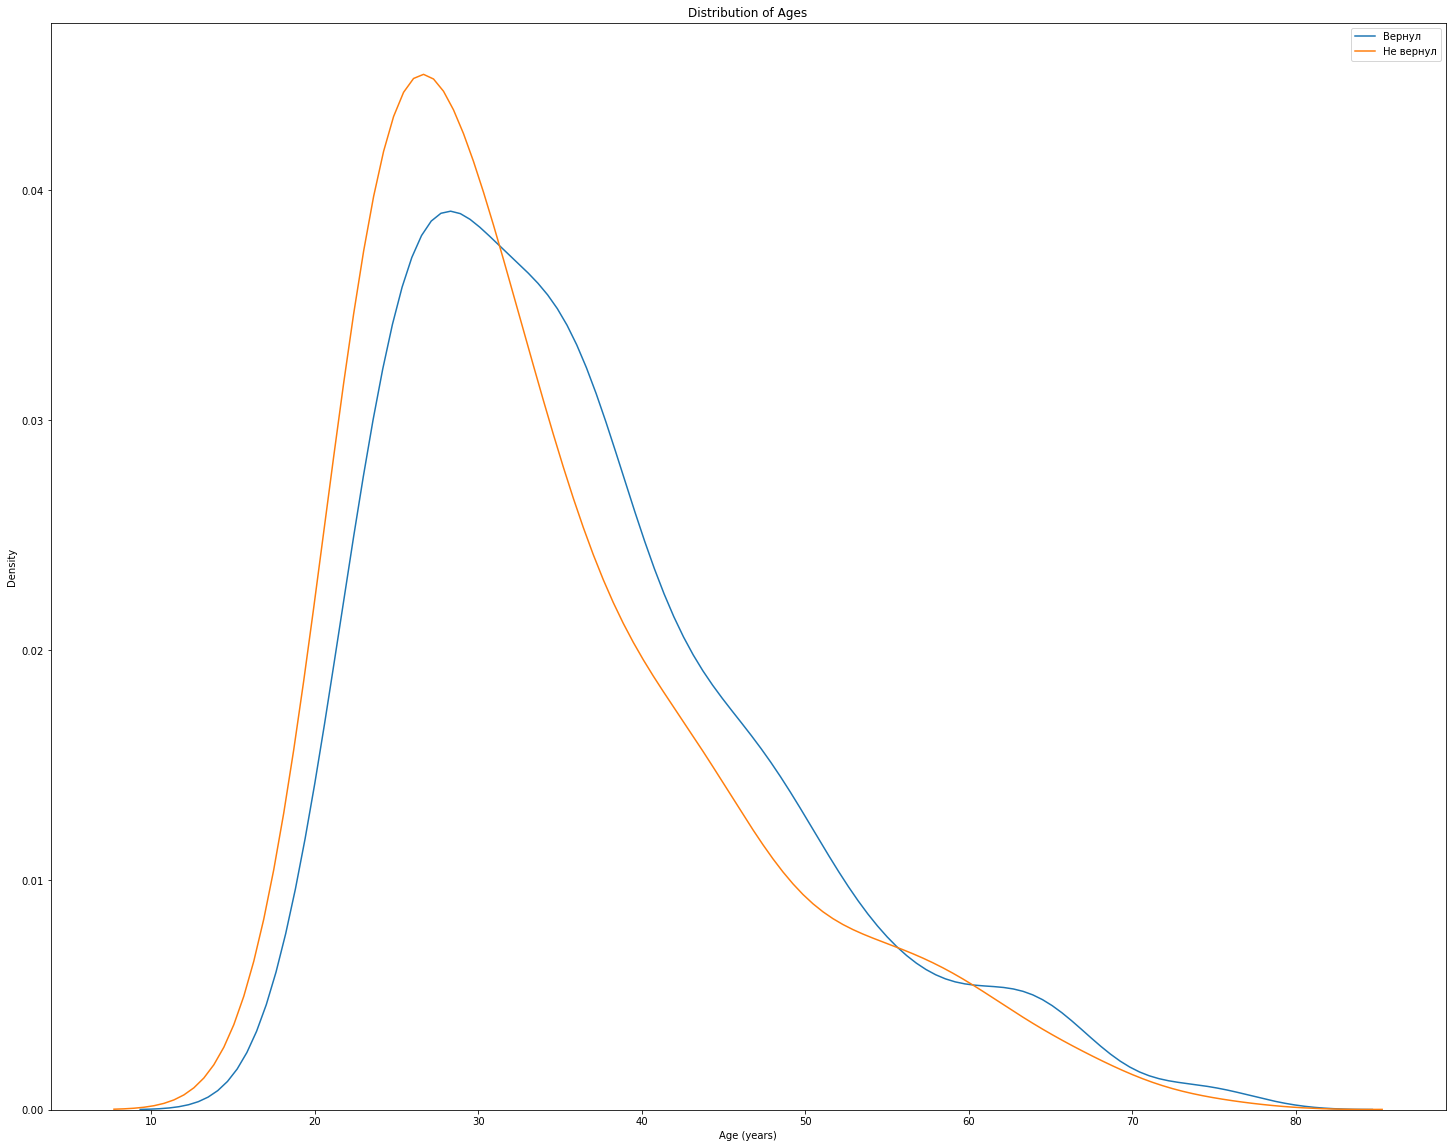

<Figure size 1440x1440 with 0 Axes>

In [10]:
#KDE - график займов 
sns.kdeplot(data.loc[data['classification'] == 1, 'age'], label = 'Вернул')
sns.kdeplot(data.loc[data['classification'] == 0, 'age'], label = 'Не вернул')
plt.rcParams['figure.figsize'] = (15,15)
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')
plt.figure(figsize = (20, 20))



<Figure size 1080x1080 with 0 Axes>

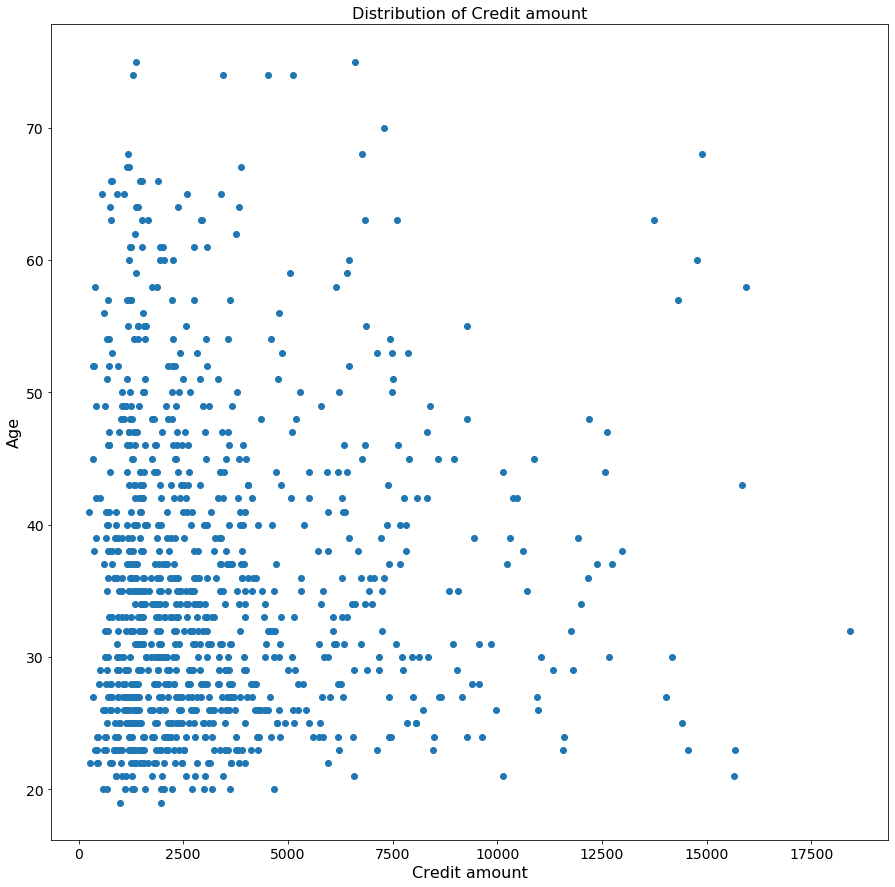

<Figure size 1080x1080 with 0 Axes>

In [11]:
plt.scatter(data_new['creditamount'],data_new["age"])
plt.xlabel('Credit amount', size=16); plt.ylabel('Age', size=16); plt.title('Distribution of Credit amount', size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.figure()

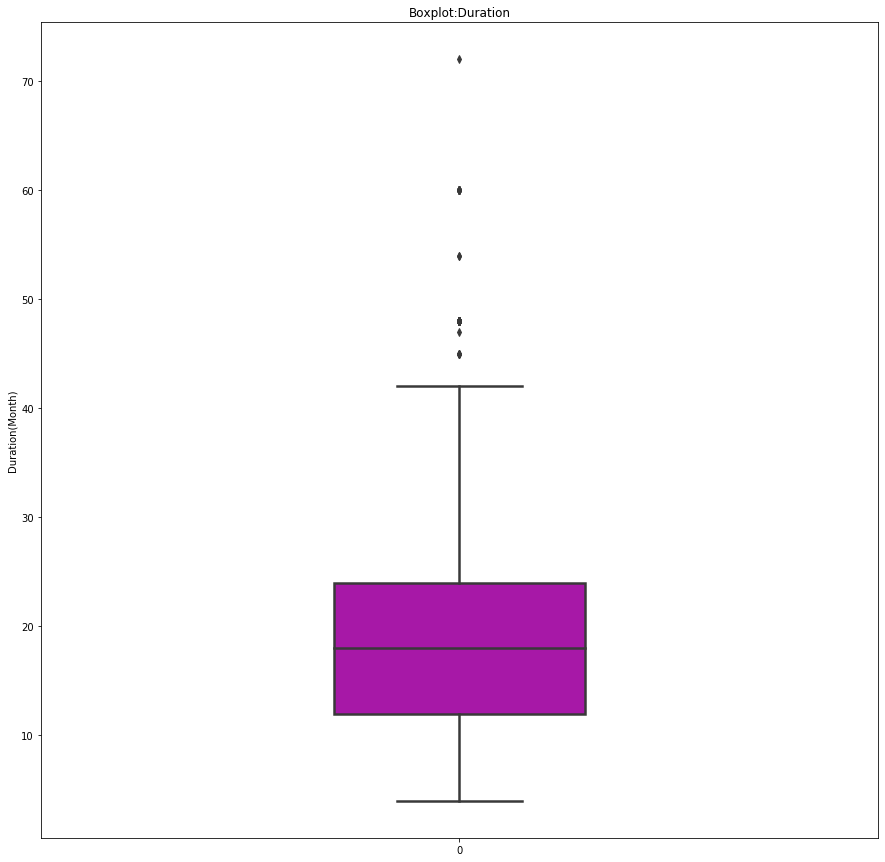

In [12]:
plt.title('Boxplot:Duration')
plt.ylabel('Duration(Month)')
sns.boxplot(data=data.duration, width=.3 ,linewidth=2.5, color='m')

In [13]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    sns.set_color_codes("deep")
    temp = dc[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Количество займов': temp.values})

    cat_perc = dc[[feature, 'classification']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='classification', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    s = sns.barplot(ax=ax1, x = feature, y="Количество займов",data=df1,  palette="deep")
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)    
    s = sns.barplot(ax=ax2, x = feature, y='classification',  data=cat_perc, palette="deep")
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Доля невозвратных', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();


In [14]:
'''
A40 : car (new) 0
A41 : car (used) 1
A42 : furniture/equipment 3
A43 : radio/television 4
A44 : domestic appliances 5
A45 : repairs 6
A46 : education 7
A48 : retraining 8
A49 : business 9
A410 : others 2

data_names = dc
data_names.purpose.replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
                           ["car (new)", "car (used)", "others", "furniture/equipment", "radio/television", "domestic appliances",
                           "repairs", "education", "retraining", "business"], inplace=True)
'''

'\nA40 : car (new) 0\nA41 : car (used) 1\nA42 : furniture/equipment 3\nA43 : radio/television 4\nA44 : domestic appliances 5\nA45 : repairs 6\nA46 : education 7\nA48 : retraining 8\nA49 : business 9\nA410 : others 2\n\ndata_names = dc\ndata_names.purpose.replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], \n                           ["car (new)", "car (used)", "others", "furniture/equipment", "radio/television", "domestic appliances",\n                           "repairs", "education", "retraining", "business"], inplace=True)\n'

In [15]:
def plt_stat(var):
    temp = dc[var].value_counts()
    df1 = pd.DataFrame({var: temp.index,'Количество займов': temp.values})
    class_perc = dc[[var, 'classification']].groupby([var],as_index=False).mean()
    class_perc.sort_values(by='classification', ascending=False, inplace=True)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6))
    sns.barplot(ax=ax1, x = var, y="Количество займов",data=df1,  palette="deep")
    sns.barplot(ax=ax2, x = var, y="classification",  data=class_perc, palette="deep")
    plt.ylabel("Доля проблемных", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

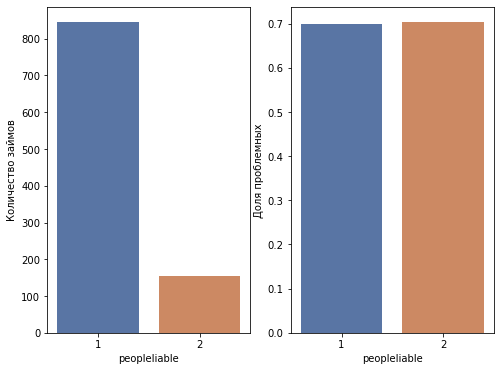

In [16]:
plt_stat('peopleliable')


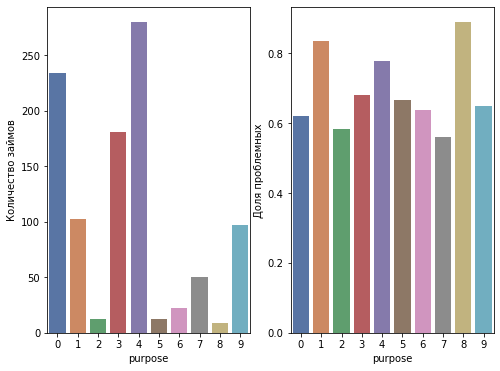

In [17]:
plt_stat('purpose')

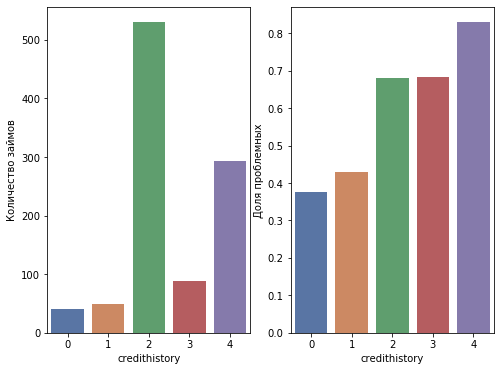

In [18]:
plt_stat('credithistory')

In [19]:
# Функция для отчётов по оценке работы алгоритма

def get_eval1(clf, x, y):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(clf, x, y, cv=2, scoring='accuracy')
    scores2 = cross_val_score(clf, x, y, cv=2, scoring='precision')
    scores3 = cross_val_score(clf, x, y, cv=2, scoring='recall')
    scores4 = cross_val_score(clf, x, y, cv=2, scoring='roc_auc')
    
    # Средний скор и стандартное отклонение оценки скора
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std()))
    
    return 

def get_eval2(clf, x_train, y_train, x_test, y_test):
    # Cross Validation для тестирования и предотвращения переобучения
    scores1 = cross_val_score(clf, x_test, y_test, cv=2, scoring='accuracy')
    scores2 = cross_val_score(clf, x_test, y_test, cv=2, scoring='precision')
    scores3 = cross_val_score(clf, x_test, y_test, cv=2, scoring='recall')
    scores4 = cross_val_score(clf, x_test, y_test, cv=2, scoring='roc_auc')
    
 # Средний скор и стандартное отклонение оценки скора
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores4.mean(), scores4.std()))
    
    return  
  
# Функция для получения roc-curve кривой
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return


In [20]:
# Разделение датасета на подвыборки - обучающую и тестовую
# Unscaled, unnormalized data
x_clean = data_new.drop('classification', axis=1)
y_clean = data_new['classification']
x_train_clean, x_test_clean, y_train_clean, y_test_clean = train_test_split(x_clean,y_clean,test_size=0.2, random_state=1)

LogisticRegression
LogisticRegression() 

Cross Validation Accuracy: 0.74 (+/- 0.01)
Cross Validation Precision: 0.78 (+/- 0.01)
Cross Validation Recall: 0.87 (+/- 0.00)
Cross Validation roc_auc: 0.77 (+/- 0.00)
Cross Validation Accuracy: 0.73 (+/- 0.00)
Cross Validation Precision: 0.77 (+/- 0.00)
Cross Validation Recall: 0.88 (+/- 0.01)
Cross Validation roc_auc: 0.67 (+/- 0.03)


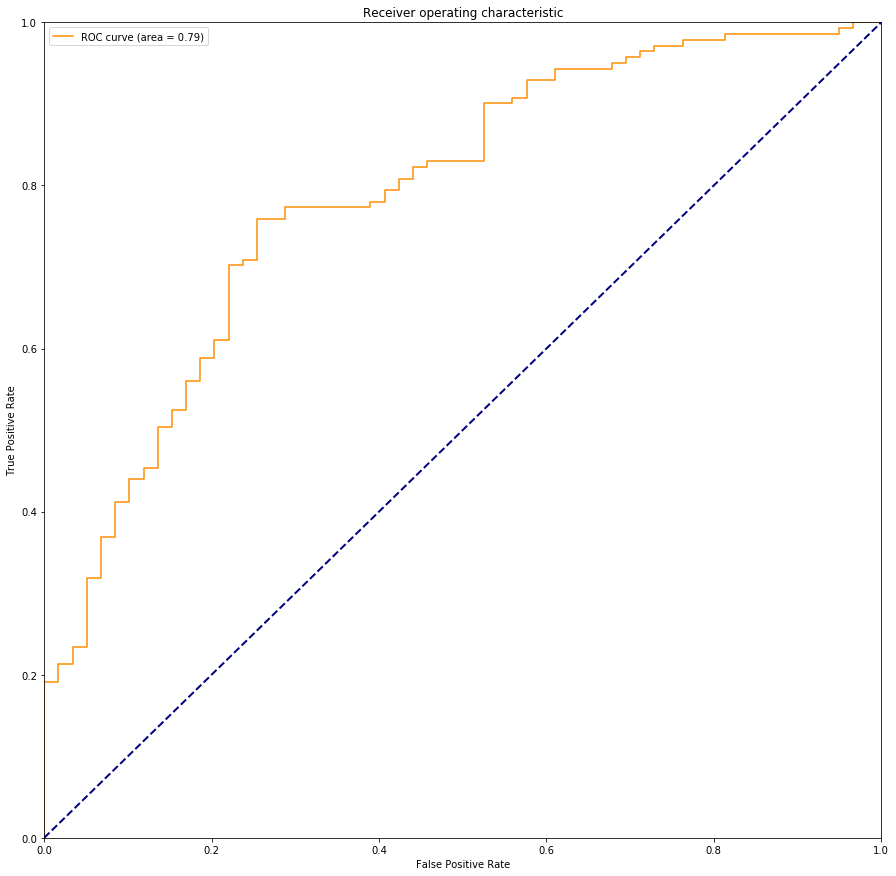

              precision    recall  f1-score   support

           0       0.46      0.66      0.54        41
           1       0.90      0.80      0.85       159

    accuracy                           0.77       200
   macro avg       0.68      0.73      0.69       200
weighted avg       0.81      0.77      0.78       200

Коэффициенты:  [[-0.02050133 -0.00012032 -0.30220048 -0.03930471  0.02562228 -0.04798501
   0.05700242 -0.76129572 -0.19470087  0.07827253  1.17166323 -0.3879747
  -0.19879184  0.17375327 -0.02003494  0.72698739 -0.60140564  0.70684689
   0.02509529  0.12033631  0.47214208 -0.02745399 -0.12371898 -0.12621719
   0.03924436 -0.19092996 -0.41941273 -0.06595212  0.06972849  0.25782325
   0.45175229 -0.00767676 -0.15030812 -0.04968577  0.47830282  0.023307
  -0.12648729 -0.04699605  0.38319022  0.0842323   0.18868864 -0.16483227
   0.27008281  0.39453126  0.06425613 -0.0313841  -0.13346411 -0.16241899
  -0.10294486  0.55930302 -0.09255905  0.38638311  0.00011511  0.0152

In [21]:
from sklearn.linear_model import LogisticRegression
def logregclf(x_train, y_train, x_test, y_test):
    print("LogisticRegression")
    model = LogisticRegression().fit(x_train, y_train)
    print(model,'\n')
    y_pred = model.predict_proba(x_test)[:,1]
    y_p = model.predict(x_test)
    get_eval1(model, x_clean, y_clean)
    get_eval2(model, x_train, y_train, x_test, y_test)
    get_roc (y_test,y_pred)
    print(cr(y_p, y_test))
    np.set_printoptions(suppress=True)
    print('Коэффициенты: ', model.coef_, ', свободный член: ', model.intercept_)
    return
logregclf(x_train_clean, y_train_clean, x_test_clean, y_test_clean)


MLPClassifier
Cross Validation Accuracy: 0.72 (+/- 0.02)
Cross Validation Precision: 0.73 (+/- 0.03)
Cross Validation Recall: 0.98 (+/- 0.02)
Cross Validation roc_auc: 0.76 (+/- 0.03)
Cross Validation Accuracy: 0.70 (+/- 0.01)
Cross Validation Precision: 0.70 (+/- 0.01)
Cross Validation Recall: 1.00 (+/- 0.00)
Cross Validation roc_auc: 0.51 (+/- 0.10)


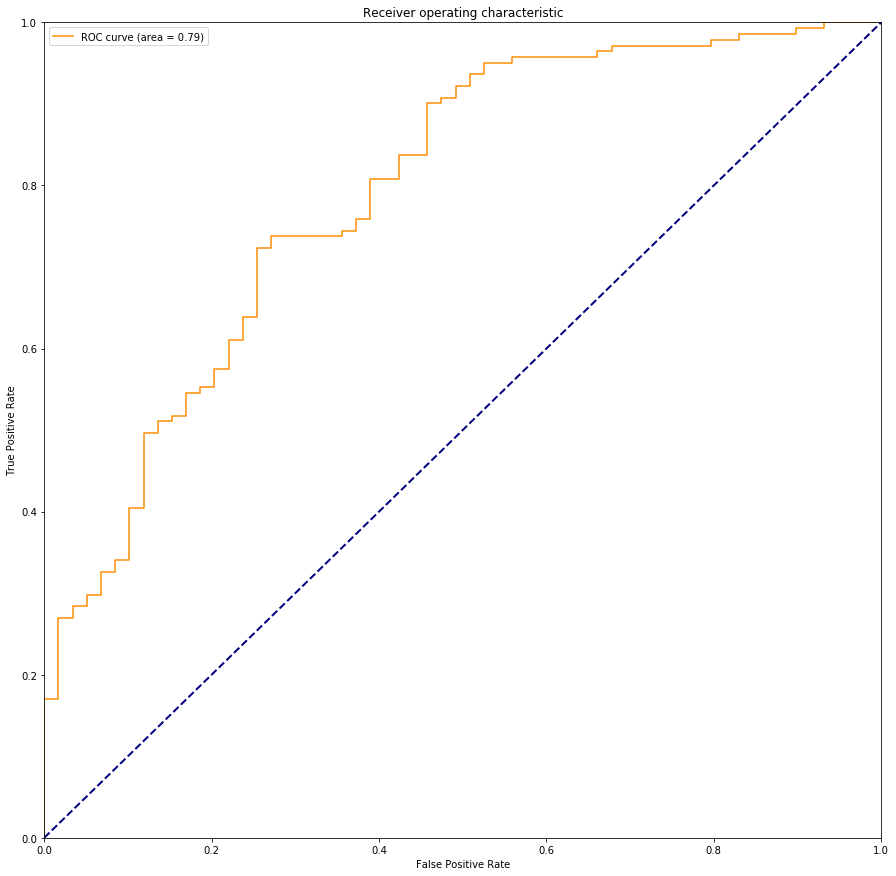

              precision    recall  f1-score   support

           0       0.25      0.79      0.38        19
           1       0.97      0.76      0.85       181

    accuracy                           0.76       200
   macro avg       0.61      0.77      0.62       200
weighted avg       0.90      0.76      0.81       200



In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

print("MLPClassifier")
clf = MLPClassifier(activation='logistic', solver='adam', random_state=1, max_iter=300).fit(x_train_clean, y_train_clean)
clf.predict_proba(x_test_clean[:1])
clf.predict(x_test_clean[:5])
clf.score(x_test_clean, y_test_clean)
model=clf
y_pred = model.predict_proba(x_test_clean)[:,1]
y_p = model.predict(x_test_clean)
get_eval1(model, x_clean, y_clean)
get_eval2(model, x_train_clean, y_train_clean, x_test_clean, y_test_clean)
get_roc (y_test_clean,y_pred)
print(cr(y_p, y_test_clean))
np.set_printoptions(suppress=True)


MLPClassifier
Cross Validation Accuracy: 0.70 (+/- 0.00)
Cross Validation Precision: 0.70 (+/- 0.00)
Cross Validation Recall: 1.00 (+/- 0.00)
Cross Validation roc_auc: 0.66 (+/- 0.04)
Cross Validation Accuracy: 0.70 (+/- 0.01)
Cross Validation Precision: 0.70 (+/- 0.01)
Cross Validation Recall: 1.00 (+/- 0.00)
Cross Validation roc_auc: 0.62 (+/- 0.02)


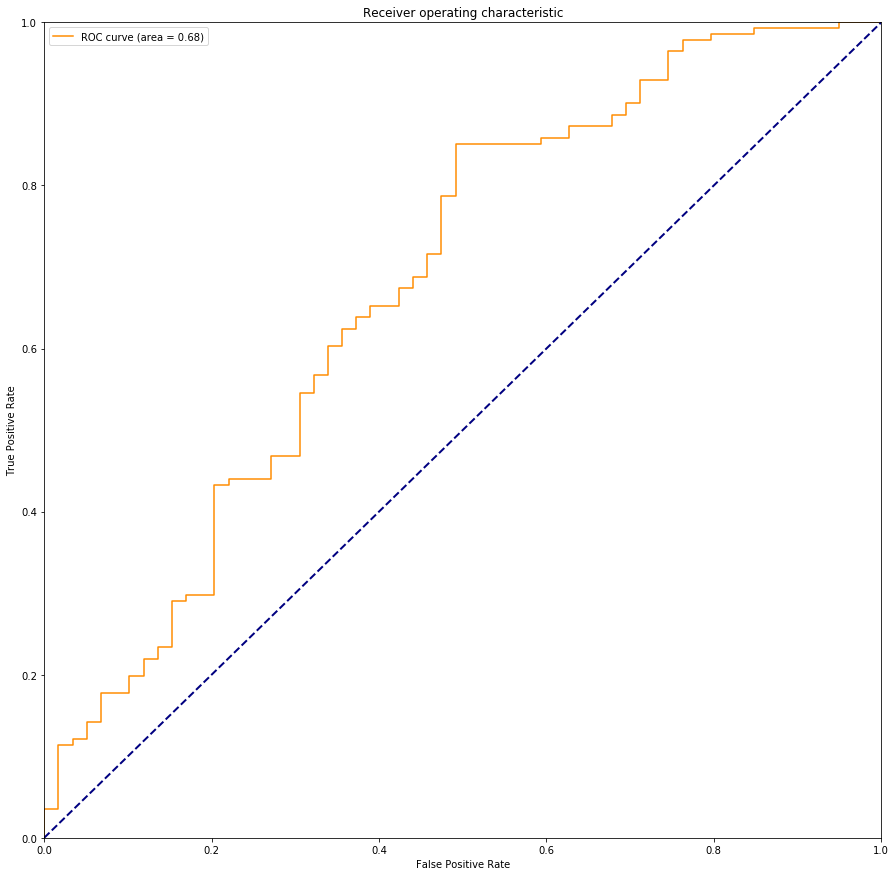

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.70      0.83       200

    accuracy                           0.70       200
   macro avg       0.50      0.35      0.41       200
weighted avg       1.00      0.70      0.83       200



In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

print("MLPClassifier")
model = MLPClassifier(activation='tanh', random_state=1, max_iter=300).fit(x_train_clean, y_train_clean)
model.predict_proba(x_test_clean[:1])
model.predict(x_test_clean[:5])
model.score(x_test_clean, y_test_clean)
y_pred = model.predict_proba(x_test_clean)[:,1]
y_p = model.predict(x_test_clean)
get_eval1(model, x_clean, y_clean)
get_eval2(model, x_train_clean, y_train_clean, x_test_clean, y_test_clean)
get_roc (y_test_clean,y_pred)
print(cr(y_p, y_test_clean))
np.set_printoptions(suppress=True)

DecisionTreeClassifier
Cross Validation Accuracy: 0.71 (+/- 0.01)
Cross Validation Precision: 0.73 (+/- 0.00)
Cross Validation Recall: 0.92 (+/- 0.01)
Cross Validation roc_auc: 0.71 (+/- 0.01)
Cross Validation Accuracy: 0.70 (+/- 0.01)
Cross Validation Precision: 0.70 (+/- 0.01)
Cross Validation Recall: 1.00 (+/- 0.00)
Cross Validation roc_auc: 0.50 (+/- 0.00)


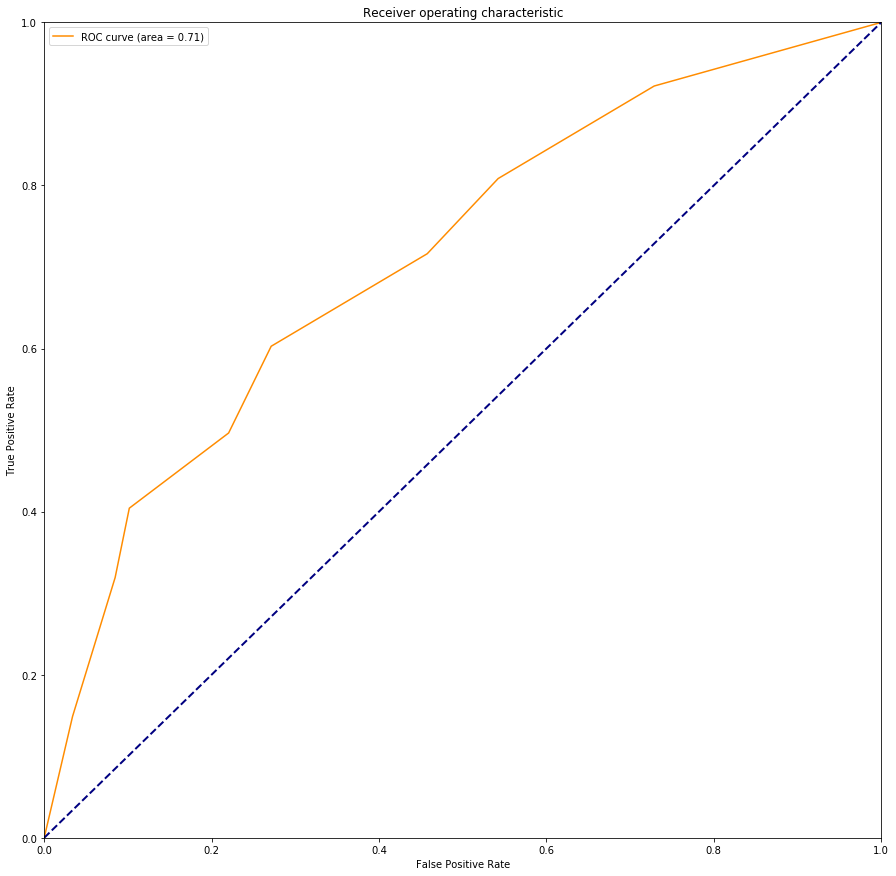

              precision    recall  f1-score   support

           0       0.27      0.59      0.37        27
           1       0.92      0.75      0.83       173

    accuracy                           0.73       200
   macro avg       0.60      0.67      0.60       200
weighted avg       0.83      0.73      0.77       200



In [45]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import export_graphviz

print("DecisionTreeClassifier")
model = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=60, max_depth = 4).fit(x_train_clean, y_train_clean)
model.predict_proba(x_test_clean[:1])
model.predict(x_test_clean[:5])
model.score(x_test_clean, y_test_clean)
y_pred = model.predict_proba(x_test_clean)[:,1]
y_p = model.predict(x_test_clean)
get_eval1(model, x_clean, y_clean)
get_eval2(model, x_train_clean, y_train_clean, x_test_clean, y_test_clean)
get_roc (y_test_clean,y_pred)
print(cr(y_p, y_test_clean))
np.set_printoptions(suppress=True)


KNeighborsClassifier
Cross Validation Accuracy: 0.70 (+/- 0.01)
Cross Validation Precision: 0.71 (+/- 0.00)
Cross Validation Recall: 0.97 (+/- 0.02)
Cross Validation roc_auc: 0.59 (+/- 0.03)
Cross Validation Accuracy: 0.68 (+/- 0.03)
Cross Validation Precision: 0.70 (+/- 0.01)
Cross Validation Recall: 0.95 (+/- 0.05)
Cross Validation roc_auc: 0.54 (+/- 0.03)


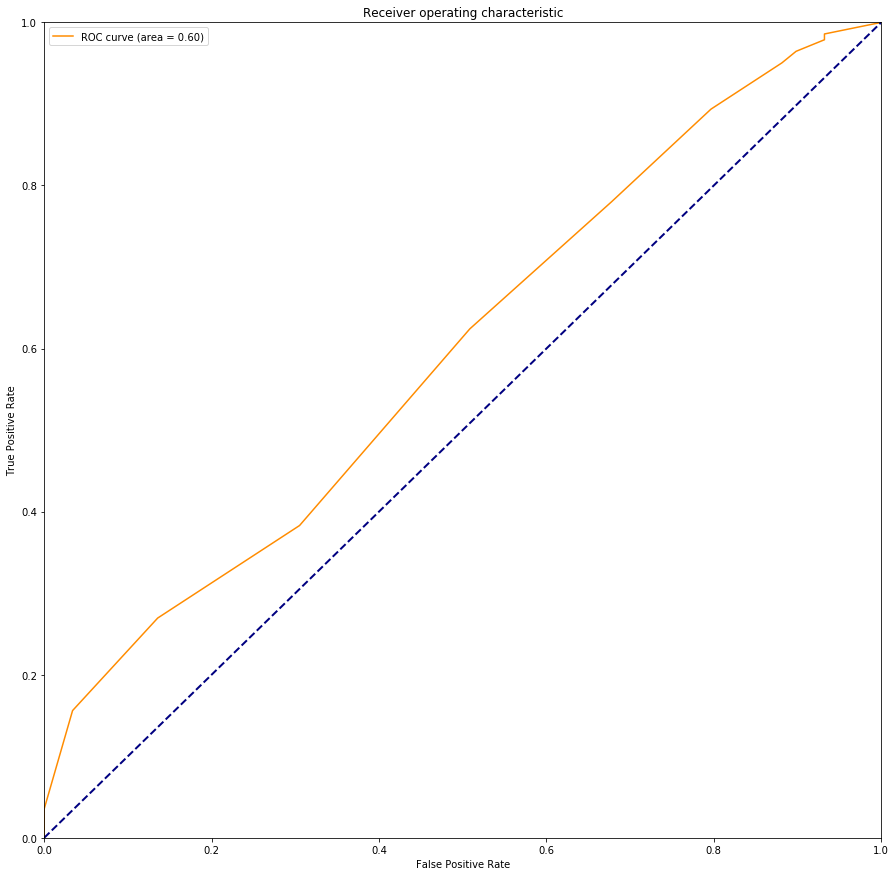

              precision    recall  f1-score   support

           0       0.12      0.50      0.19        14
           1       0.95      0.72      0.82       186

    accuracy                           0.70       200
   macro avg       0.53      0.61      0.51       200
weighted avg       0.89      0.70      0.78       200



In [48]:
from sklearn.neighbors import KNeighborsClassifier

print("KNeighborsClassifier")
model = KNeighborsClassifier(n_neighbors=17).fit(x_train_clean, y_train_clean)
model.predict_proba(x_test_clean[:1])
model.predict(x_test_clean[:5])
model.score(x_test_clean, y_test_clean)
y_pred = model.predict_proba(x_test_clean)[:,1]
y_p = model.predict(x_test_clean)
get_eval1(model, x_clean, y_clean)
get_eval2(model, x_train_clean, y_train_clean, x_test_clean, y_test_clean)
get_roc (y_test_clean,y_pred)
print(cr(y_p, y_test_clean))
np.set_printoptions(suppress=True)

SVM
SVC(probability=True) 

Cross Validation Accuracy: 0.70 (+/- 0.00)
Cross Validation Precision: 0.71 (+/- 0.00)
Cross Validation Recall: 0.99 (+/- 0.01)
Cross Validation roc_auc: 0.54 (+/- 0.01)
Cross Validation Accuracy: 0.70 (+/- 0.01)
Cross Validation Precision: 0.71 (+/- 0.00)
Cross Validation Recall: 0.99 (+/- 0.01)
Cross Validation roc_auc: 0.55 (+/- 0.05)


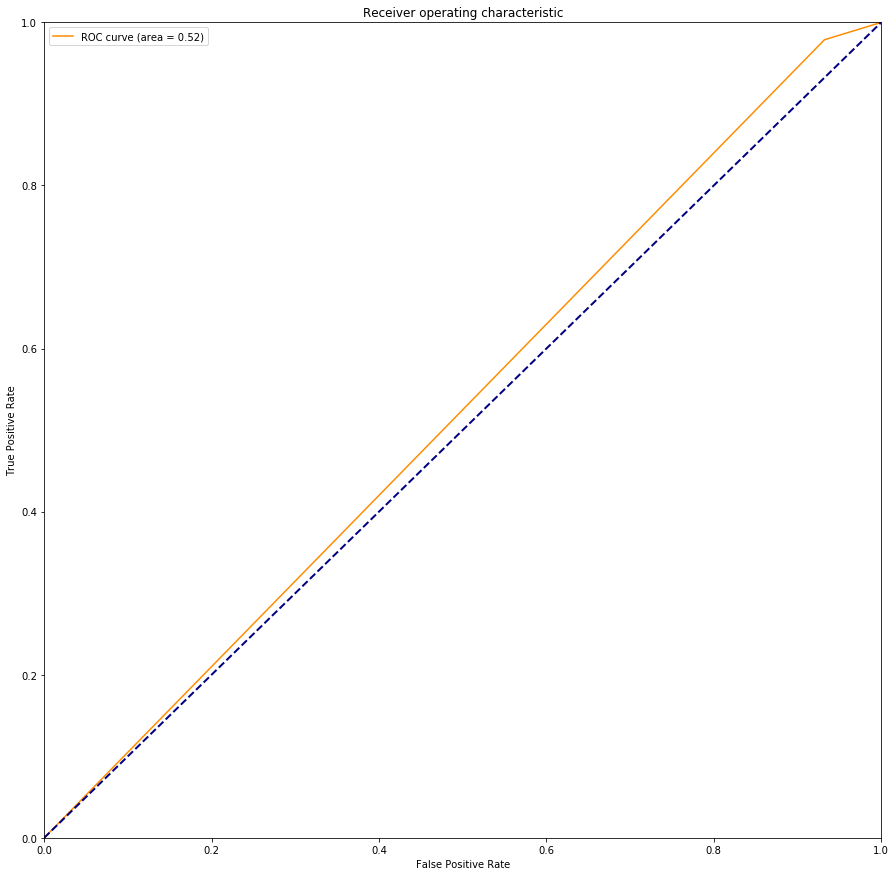

              precision    recall  f1-score   support

           0       0.07      0.57      0.12         7
           1       0.98      0.72      0.83       193

    accuracy                           0.71       200
   macro avg       0.52      0.64      0.47       200
weighted avg       0.95      0.71      0.80       200



In [24]:
from sklearn.svm import SVC
def svmclf(x_train, y_train, x_test, y_test):
    print("SVM")
    s = SVC(probability= True).fit(x_train, y_train)
    print(s,'\n')
    y_pred = s.predict_proba(x_test)[:,1]
    y_p = s.predict(x_test)
    get_eval1(s, x_clean, y_clean)
    get_eval2(s, x_train, y_train, x_test, y_test)    
    get_roc (y_test,y_p)
    print(cr(y_p, y_test))
    return
svmclf(x_train_clean, y_train_clean, x_test_clean, y_test_clean)
